In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import missingno as msno

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
folder_path = '/content/drive/My Drive/'

#Import csv

In [4]:
filename = folder_path + 'final_df_multiple_ABG.csv'
data = pd.read_csv(filename)

In [ ]:
with pd.option_context('display.max_columns', None):
    display(data)

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,region,admission_age,sex_female,weight_admission,height_admission,BMI_admission,datetime_hospital_admit,datetime_hospital_discharge,datetime_icu_admit,datetime_icu_discharge,los_hospital,los_ICU,comorbidity_score_name,comorbidity_score_value,in_hospital_mortality,race_ethnicity,SaO2_timestamp,pH,pCO2,pO2,SaO2,SpO2,Carboxyhemoglobin,Methemoglobin,SpO2_timestamp,delta_SpO2,delta_vitals_heart_rate,vitals_heart_rate,delta_vitals_resp_rate,vitals_resp_rate,delta_vitals_mbp_ni,vitals_mbp_ni,delta_vitals_sbp_ni,vitals_sbp_ni,delta_vitals_dbp_ni,vitals_dbp_ni,delta_vitals_mbp_i,vitals_mbp_i,delta_vitals_sbp_i,vitals_sbp_i,delta_vitals_dbp_i,vitals_dbp_i,delta_vitals_tempc,vitals_tempc,delta_cbc_hemoglobin,cbc_hemoglobin,delta_cbc_hematocrit,cbc_hematocrit,delta_cbc_mch,cbc_mch,delta_cbc_mchc,cbc_mchc,delta_cbc_mcv,cbc_mcv,delta_cbc_platelet,cbc_platelet,delta_cbc_rbc,cbc_rbc,delta_cbc_rdw,cbc_rdw,delta_cbc_wbc,cbc_wbc,delta_coag_fibrinogen,coag_fibrinogen,delta_coag_inr,coag_inr,delta_coag_pt,coag_pt,delta_coag_ptt,coag_ptt,delta_bmp_sodium,bmp_sodium,delta_bmp_potassium,bmp_potassium,delta_bmp_chloride,bmp_chloride,delta_bmp_bicarbonate,bmp_bicarbonate,delta_bmp_bun,bmp_bun,delta_bmp_creatinine,bmp_creatinine,delta_bmp_glucose,bmp_glucose,delta_bmp_aniongap,bmp_aniongap,delta_bmp_calcium,bmp_calcium,delta_bmp_lactate,bmp_lactate,delta_hfp_alt,hfp_alt,delta_hfp_alp,hfp_alp,delta_hfp_ast,hfp_ast,delta_hfp_bilirubin_total,hfp_bilirubin_total,delta_hfp_bilirubin_direct,hfp_bilirubin_direct,delta_hfp_albumin,hfp_albumin,delta_others_ck_cpk,others_ck_cpk,delta_others_ck_mb,others_ck_mb,delta_others_ld_ldh,others_ld_ldh,delta_sofa_past_overall_24hr,sofa_past_overall_24hr,delta_sofa_past_coagulation_24hr,sofa_past_coagulation_24hr,delta_sofa_past_liver_24hr,sofa_past_liver_24hr,delta_sofa_past_cardiovascular_24hr,sofa_past_cardiovascular_24hr,delta_sofa_past_cns_24hr,sofa_past_cns_24hr,delta_sofa_past_renal_24hr,sofa_past_renal_24hr,delta_sofa_future_overall_24hr,sofa_future_overall_24hr,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,Midwest,67.0,1,86.2,160.0,33.671875,2013-12-31 22:53:00,2014-01-07 17:37:00,2014-01-01 00:00:00,2014-01-04 20:19:00,6.780556,3.833333,Charlson,3.0,0.0,White,2014-01-01 02:54:00,7.40,52.0,118.0,99.0,99.0,NaN,NaN,2014-01-01 02:54:00,0.0,-5.0,81.0,-5.0,20.0,NaN,NaN,-5.0,99.0,-5.0,58.0,-5.0,72.5,-5.0,119.0,-5.0,53.0,-20.0,37.70,-190.0,13.2,-190.0,39.8,-190.0,29.2,-190.0,33.2,-190.0,88.1,-190.0,145.0,-190.0,4.52,-190.0,13.7,-190.0,17.3,-190.0,179.0,-190.0,1.1,-190.0,11.6,-190.0,25.0,NaN,NaN,-190.0,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-114.0,9.0,-114.0,1.0,-114.0,0.0,-114.0,1.0,-114.0,4.0,-114.0,0.0,1506.0,2.0,1506.0,1.0,1506.0,0.0,1506.0,1.0,1506.0,0.0,1506.0,0.0
1,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,Midwest,67.0,1,86.2,160.0,33.671875,2013-12-31 22:53:00,2014-01-07 17:37:00,2014-01-01 00:00:00,2014-01-04 20:19:00,6.780556,3.833333,Charlson,3.0,0.0,White,2014-01-01 00:35:00,7.25,55.0,86.0,94.0,97.0,NaN,NaN,2014-01-01 00:34:00,-1.0,-1.0,83.0,-1.0,23.0,NaN,NaN,-1.0,111.0,-1.0,60.0,-1.0,80.0,-1.0,147.0,-1.0,58.0,-1.0,37.40,-51.0,13.2,-51.0,39.8,-51.0,29.2,-51.0,33.2,-51.0,88.1,-51.0,145.0,-51.0,4.52,-51.0,13.7,-51.0,17.3,-51.0,179.0,-51.0,1.1,-51.0,11.6,-51.0,25.0,NaN,NaN,-51.0,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#Preprocessing

##Derived features

In [6]:
data.dropna(subset=['sofa_past_overall_24hr',
                    'sofa_past_coagulation_24hr',
                    'sofa_past_liver_24hr',
                    'sofa_past_cardiovascular_24hr',
                    'sofa_past_cns_24hr',
                    'sofa_past_renal_24hr',
                    'sofa_future_overall_24hr',
                    'sofa_future_coagulation_24hr',
                    'sofa_future_liver_24hr',
                    'sofa_future_cardiovascular_24hr',
                    'sofa_future_cns_24hr',
                    'sofa_future_renal_24hr',
                    'in_hospital_mortality'], inplace = True)

###SOFA respiratory

In [8]:
data['sofa_past_respiratory_24hr'] = (data['sofa_past_overall_24hr']
                                    - data['sofa_past_coagulation_24hr']
                                    - data['sofa_past_liver_24hr']
                                    - data['sofa_past_cardiovascular_24hr']
                                    - data['sofa_past_cns_24hr']
                                    - data['sofa_past_renal_24hr'])

data['sofa_future_respiratory_24hr'] = (data['sofa_future_overall_24hr']
                                    - data['sofa_future_coagulation_24hr']
                                    - data['sofa_future_liver_24hr']
                                    - data['sofa_future_cardiovascular_24hr']
                                    - data['sofa_future_cns_24hr']
                                    - data['sofa_future_renal_24hr'])

In [9]:
data['sofa_future_respiratory_24hr'] = data['sofa_future_respiratory_24hr'] \
                                            .apply(lambda x: 1 if (x > 0) \
                                                else 0)

###SOFA overall increase

In [10]:
data['sofa_overall_increased'] = ((data['sofa_future_overall_24hr'] - data['sofa_past_overall_24hr']) >= 2)

In [11]:
columns_select = ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'source_db',
                    'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission',
                    'los_hospital', 'los_ICU',
                    'comorbidity_score_value',
                    'in_hospital_mortality',
                    'race_ethnicity',
                    'pH',	'pCO2',	'pO2',
                    'SaO2', 'SaO2_timestamp',
                    'SpO2', 'SpO2_timestamp',
                    'vitals_tempc',
                    'vitals_heart_rate',
                    'vitals_resp_rate',
                    'vitals_mbp_ni',
                    'vitals_mbp_i',
                    'cbc_hemoglobin',
                    'cbc_hematocrit',
                    'cbc_mch',
                    'cbc_mchc',
                    'cbc_mcv',
                    'cbc_platelet',
                    'cbc_rbc',
                    'cbc_rdw',
                    'cbc_wbc',
                    'coag_fibrinogen',
                    'coag_inr',
                    'coag_pt',
                    'coag_ptt',
                    'bmp_sodium',
                    'bmp_potassium',
                    'bmp_chloride',
                    'bmp_bicarbonate',
                    'bmp_bun',
                    'bmp_creatinine',
                    'bmp_glucose',
                    'bmp_aniongap',
                    'bmp_calcium',
                    'bmp_lactate',
                    'hfp_alt',
                    'hfp_alp',
                    'hfp_ast',
                    'hfp_bilirubin_total',
                    'hfp_albumin',
                    'sofa_past_overall_24hr',
                    'sofa_past_coagulation_24hr',
                    'sofa_past_liver_24hr',
                    'sofa_past_cardiovascular_24hr',
                    'sofa_past_cns_24hr',
                    'sofa_past_renal_24hr',
                    'sofa_past_respiratory_24hr',
                    'sofa_future_overall_24hr' ,
                    'sofa_future_respiratory_24hr',
                    'sofa_overall_increased'
]

In [12]:
data = data[columns_select]

##Race and ethnicity: group and encode categories

In [13]:
data['race_ethnicity'] = data['race_ethnicity'] \
                                    .apply(lambda x: x if (x == "White") | (x == "Hispanic OR Latino") | (x == "Black") | (x == "Asian") \
                                        else "Other")

One hot encoding

In [14]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['race_ethnicity'])

In [15]:
one_hot_encoded_data = one_hot_encoded_data.rename(columns={'race_ethnicity_Hispanic OR Latino': 'race_ethnicity_HispanicLatino'})

##Missingness

Check data missingness

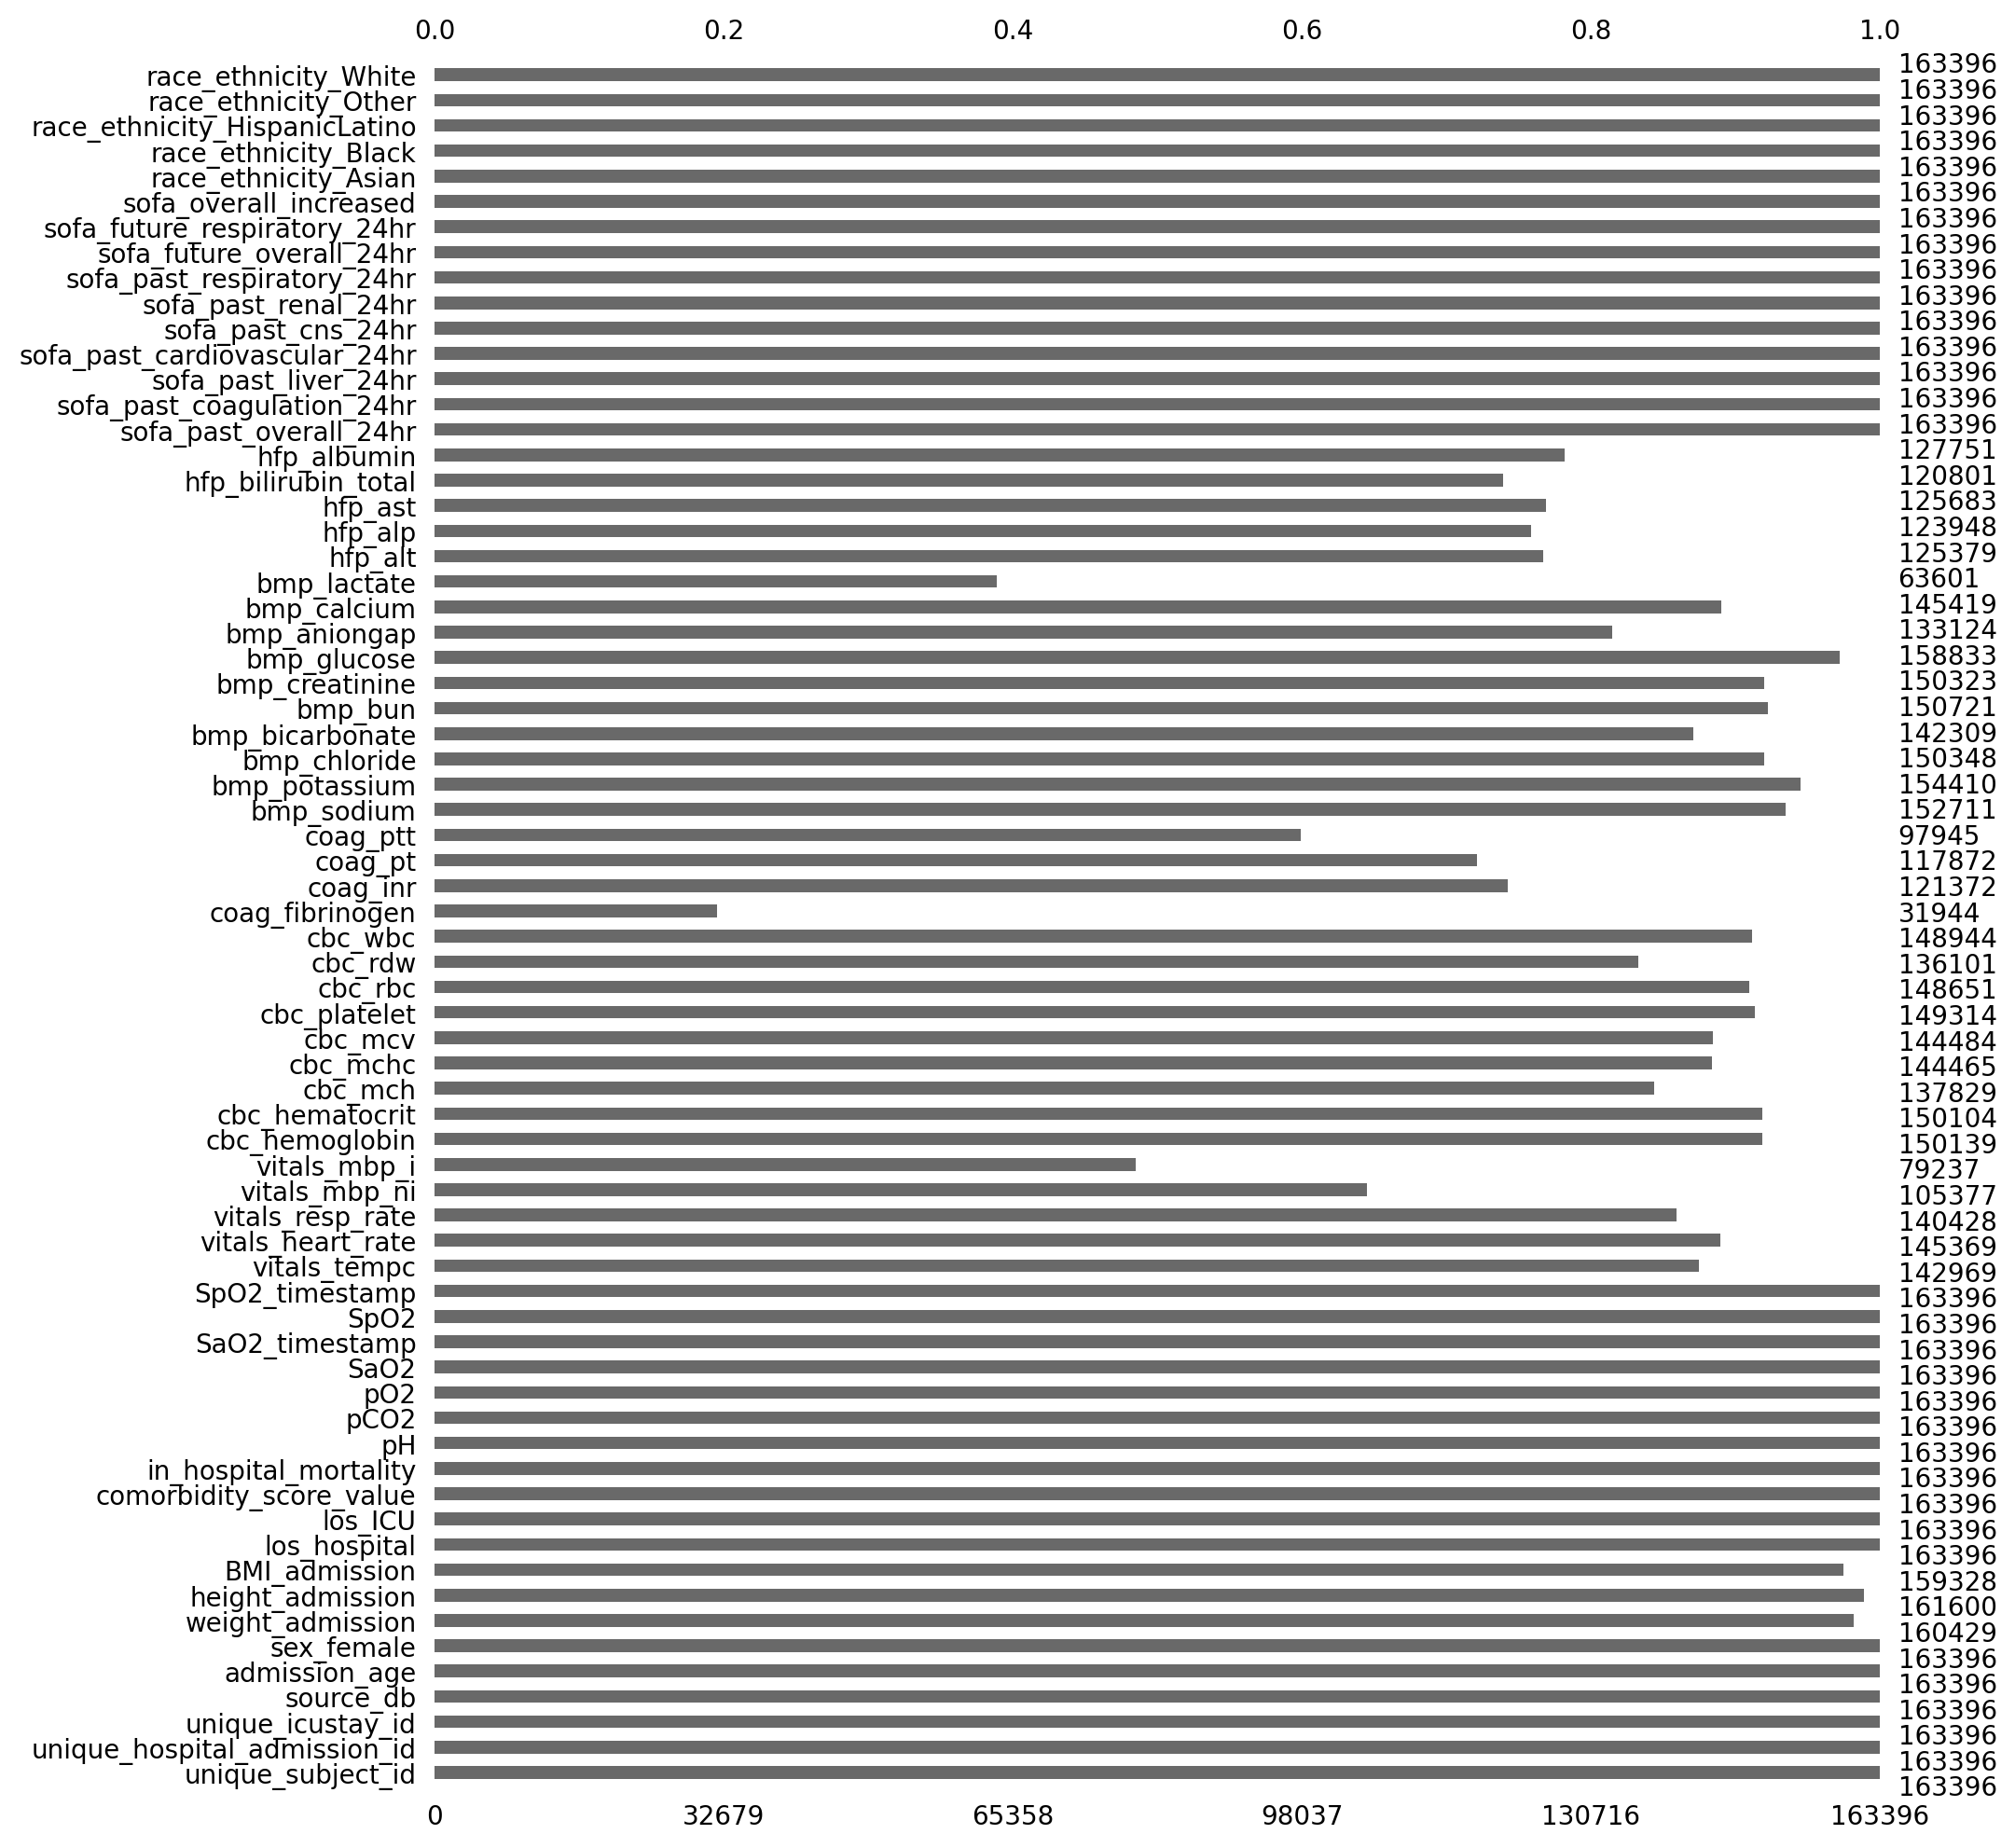

In [16]:
msno.bar(one_hot_encoded_data, figsize=(10,12), fontsize=10)
plt.show()

###Replace missing labs and vitals with their normal ranges

In [17]:
# Replace missing labs and vitals with their normal ranges
midpoint_map = {
    'cbc_mch': 29.8,
    'cbc_mchc': 33.6,
    'cbc_mcv': 90.0,
    'cbc_platelet': 300.0,
    'cbc_rbc': 5.0,
    'cbc_rdw': 13.0,
    'cbc_wbc': 7.25,
    'coag_inr': 1.0,
    'coag_pt': 10.75,
    'coag_ptt': 28.5,
    'coag_fibrinogen': 300.0,
    'hfp_alt': 31.5,
    'hfp_alp': 95.5,
    'hfp_ast': 25.0,
    'hfp_bilirubin_total': 0.65,
    'hfp_albumin': 4.4,
    'bmp_aniongap': 10.0,
    'bmp_bicarbonate': 25.0,
    'bmp_bun': 13.5,
    'bmp_calcium': 9.5,
    'bmp_chloride': 101.0,
    'bmp_creatinine': 0.9,
    'bmp_glucose': 84.5,
    'bmp_sodium': 140.0,
    'bmp_potassium': 4.25,
    'ph': 7.4,
    'bmp_lactate': 1.05,
    'vitals_heart_rate': 80.0,
    'vitals_mbp_ni': 87.5,
    'vitals_mbp_i': 87.5,
    'vitals_resp_rate': 16.0,
    'vitals_tempc': 36.65
}

data_filled = one_hot_encoded_data.fillna(midpoint_map)

data_filled['cbc_hemoglobin'][(data_filled['cbc_hemoglobin'].isnull()) & (data_filled['sex_female'] == 0)] = 15.5
data_filled['cbc_hemoglobin'][(data_filled['cbc_hemoglobin'].isnull()) & (data_filled['sex_female'] == 1)] = 13.7
data_filled['cbc_hematocrit'][(data_filled['cbc_hematocrit'].isnull()) & (data_filled['sex_female'] == 0)] = 44.4
data_filled['cbc_hematocrit'][(data_filled['cbc_hematocrit'].isnull()) & (data_filled['sex_female'] == 1)] = 39.7

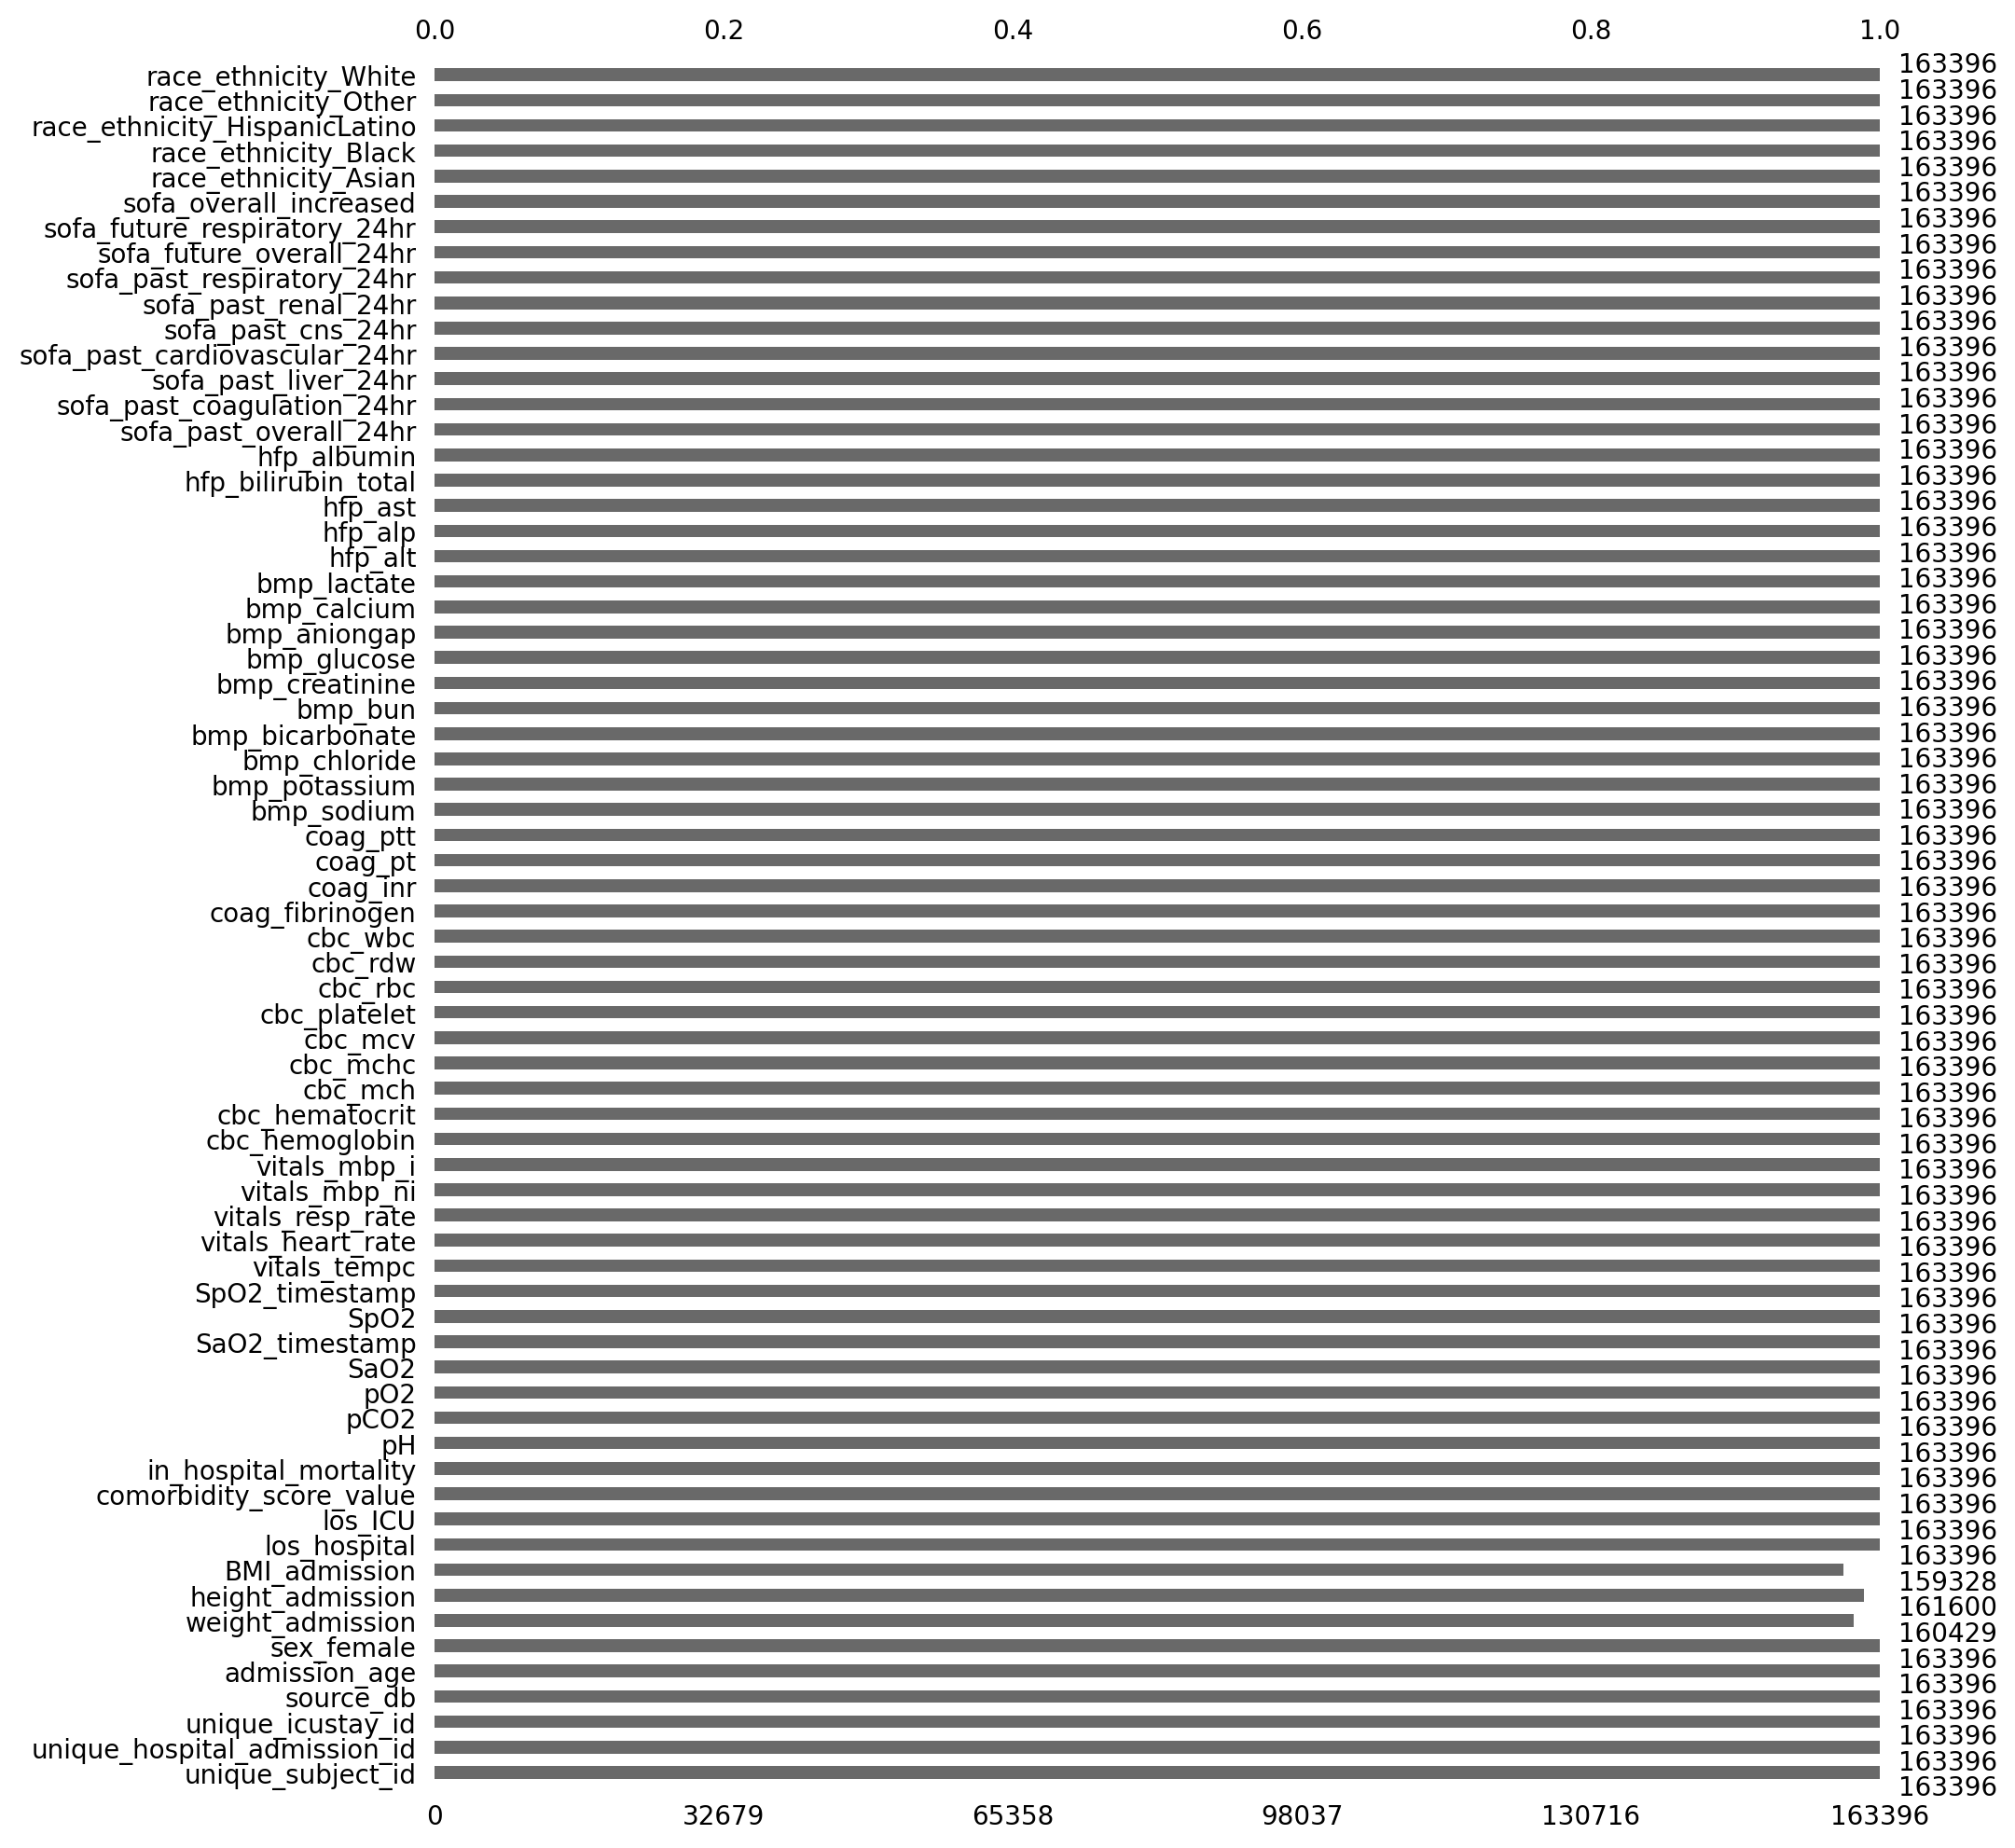

In [18]:
msno.bar(data_filled, figsize=(10,12), fontsize=10)
plt.show()

In [19]:
data_filled = data_filled.drop(['weight_admission', 'height_admission', 'BMI_admission'], axis=1)

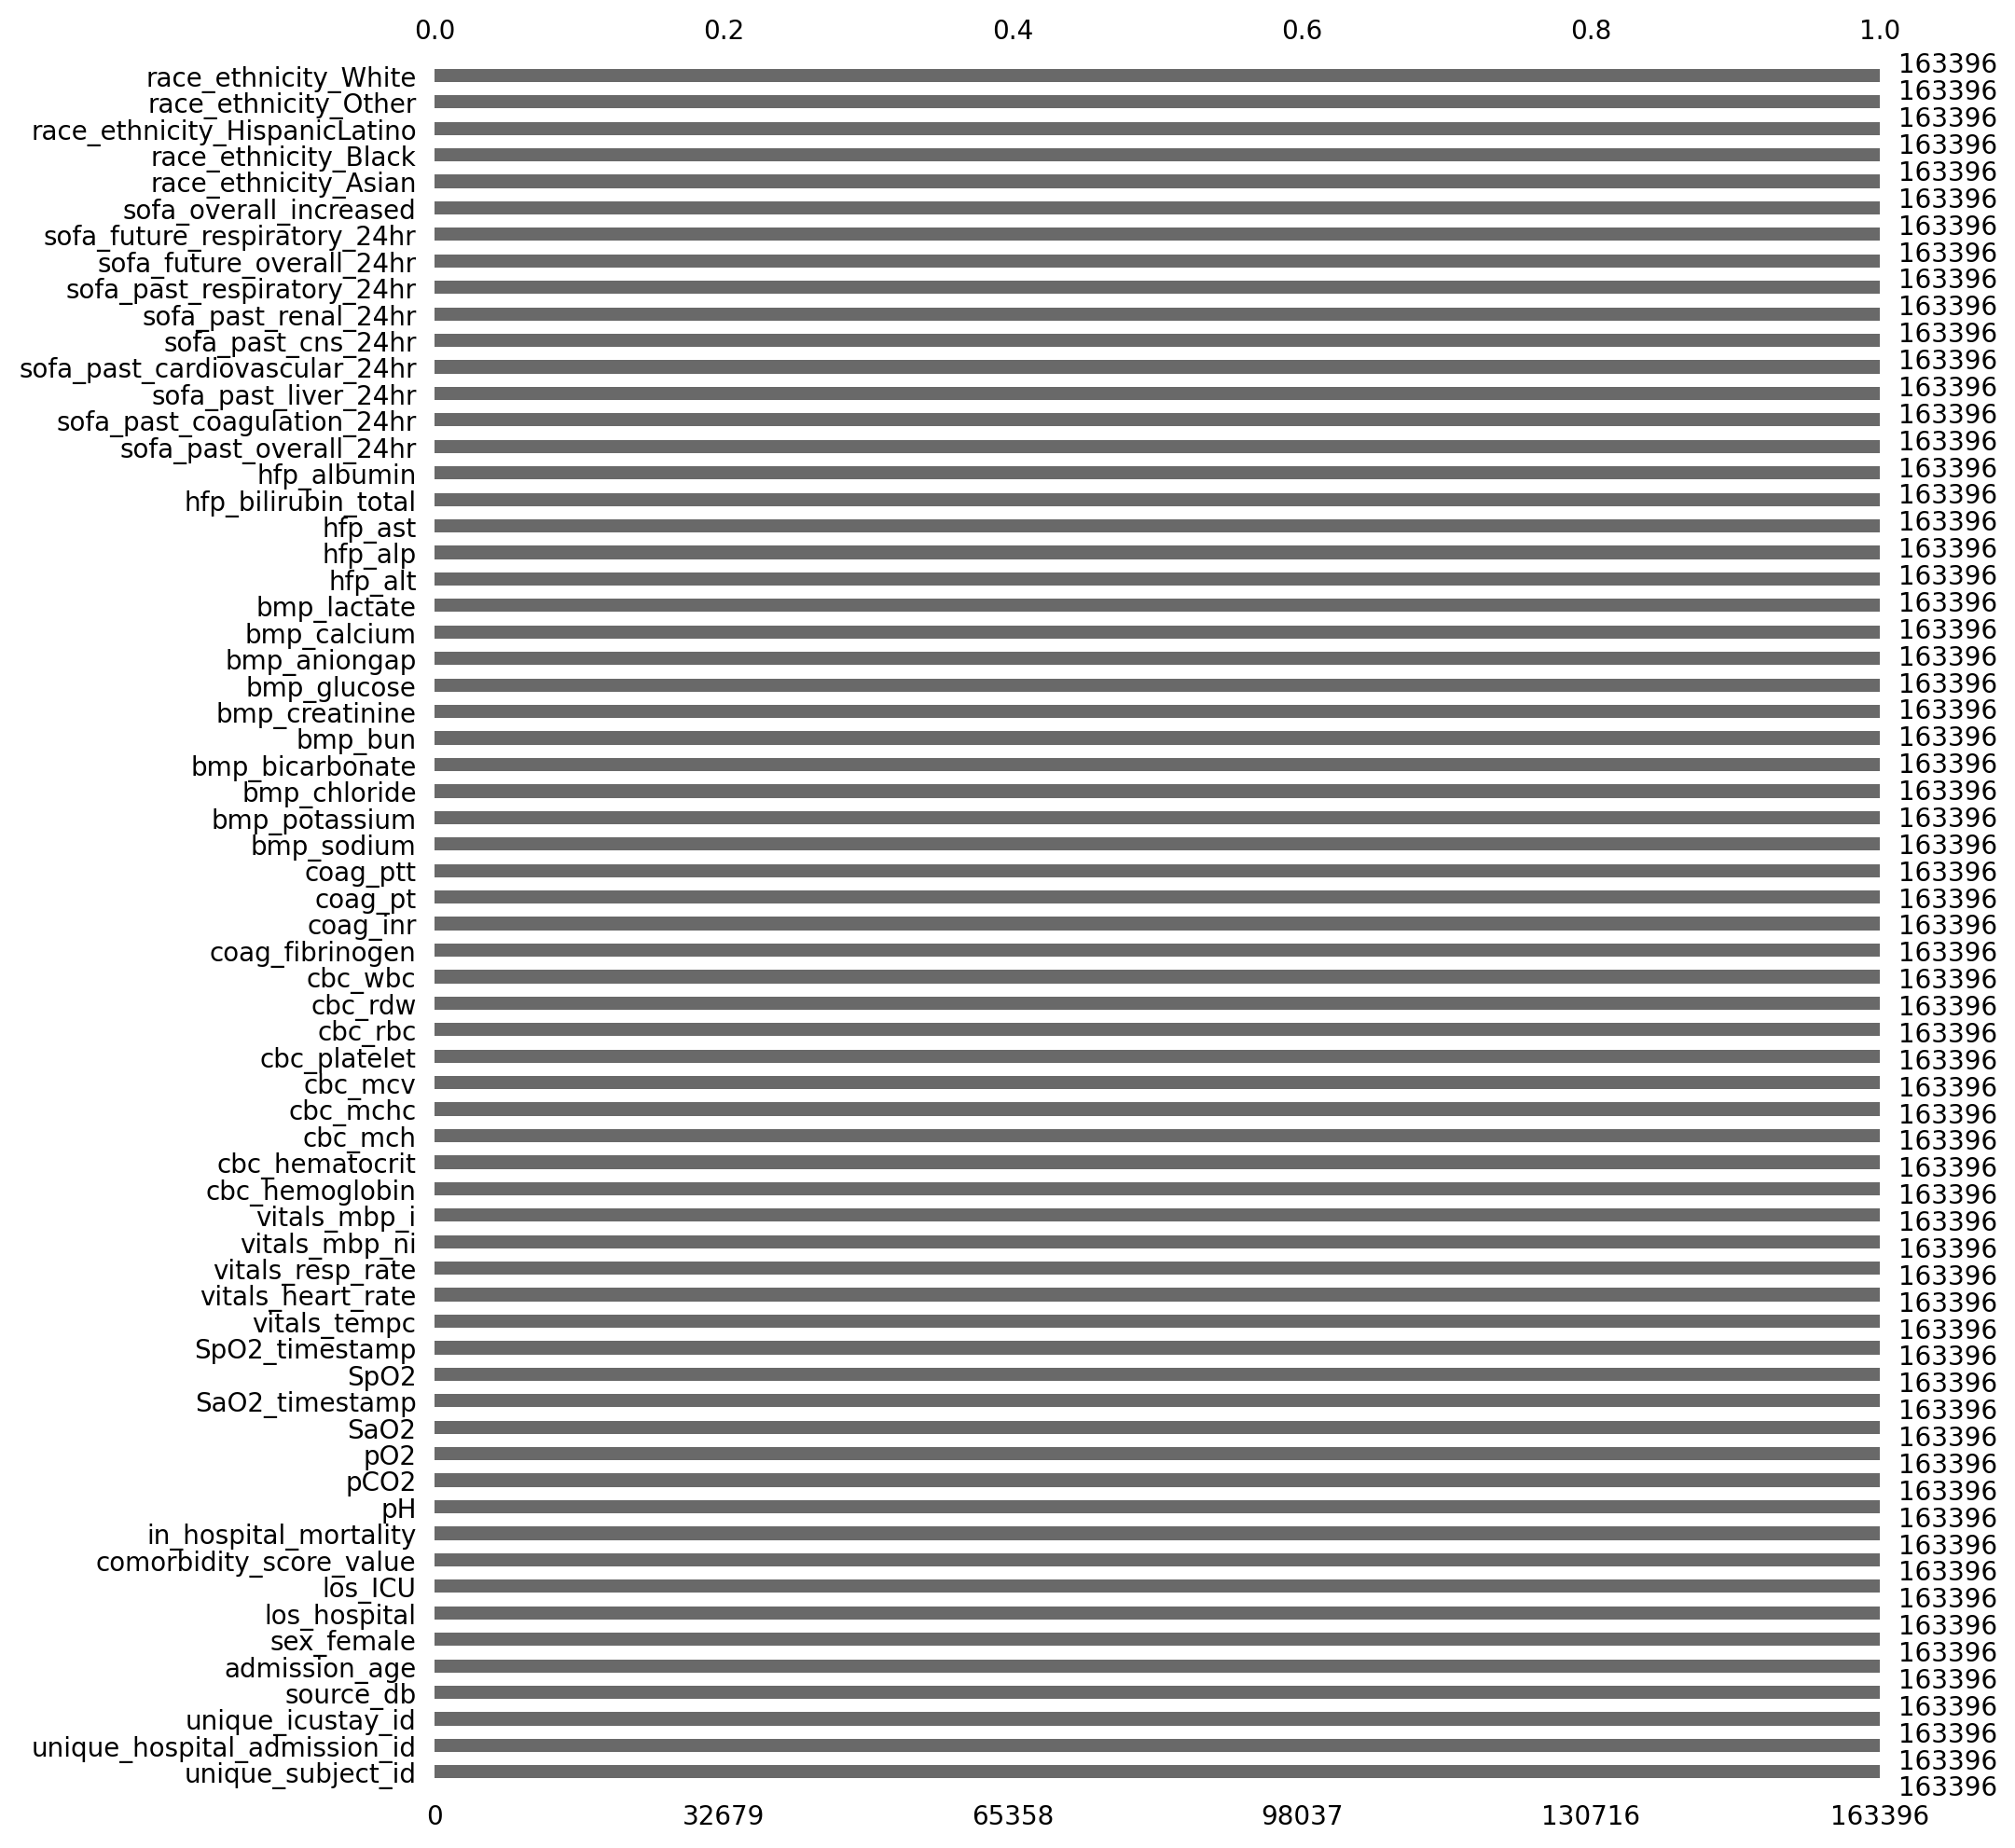

In [20]:
msno.bar(data_filled, figsize=(10,12), fontsize=10)
plt.show()

In [21]:
len(data_filled)

163396

In [22]:
data_filled.groupby('in_hospital_mortality').size()

in_hospital_mortality
0.0    124194
1.0     39202
dtype: int64

In [23]:
data_filled.groupby('sofa_overall_increased').size()

sofa_overall_increased
False    124489
True      38907
dtype: int64

In [24]:
data_filled.groupby('sofa_future_respiratory_24hr').size()

sofa_future_respiratory_24hr
0    95447
1    67949
dtype: int64

#Upload csv file

In [ ]:
data_filled.to_csv(folder_path+'O2_data.csv', index=False)
files.download(folder_path+'O2_data.csv')